<a href="https://colab.research.google.com/github/AndresNamm/StatisticsColab/blob/main/CoverageCheckWilson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.econometrics.blog/post/the-wilson-confidence-interval-for-a-proportion/

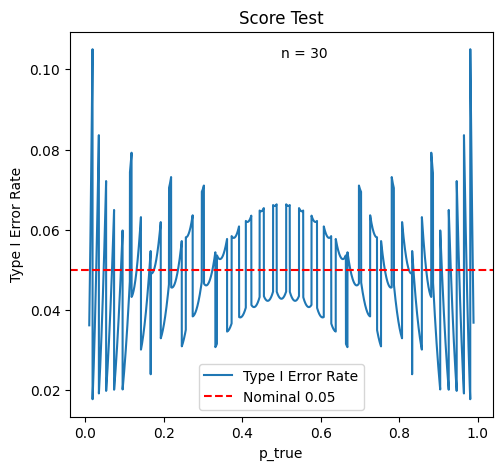

<ipython-input-1-999cdd0d7035>:56: RuntimeWarning: divide by zero encountered in divide
  return (p_hat - p0) / SE_hat


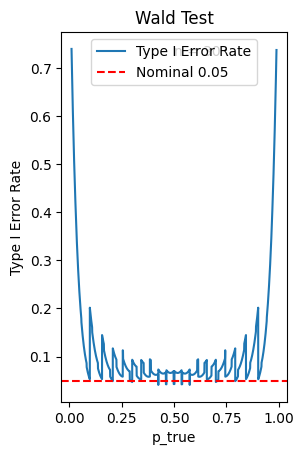

<Figure size 640x480 with 0 Axes>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

def calculate_type_i_error_rate(p_true, n, test, alpha=0.05):

    """
    Gives Type I error rate with h0 being true and having p = p_true. Calculates all the possible success
    outcomes and probabilities with p_true an binomial distribution experiment with size n
    The method then sees if those outcomes would be rejected by hypothesis test and sums up all rejected value probabilities

    Args:
    p_true (float): true population proportion.
    n (int): sample size.
    test (function): function of p_hat, n, and p_0 that computes test stat.
    alpha (float): significance level.

    Returns:
    float: Type I error rate .
    """
    x = np.arange(0, n + 1) # Gets all possible experiment success counts from 0 to n
    p_x = binom.pmf(x, n, p_true) # Gets the probabilities of all possible success values from 0 to n with probability p_true
    # The above x simulates the outcomes a sample might have and p_x is the probability of getting each of those outcomes with p_true
    test_stats = test(p_hat=x / n, sample_size=n, p0=p_true) # Gets the z score of having x successes from n with p_true as the hypothesized probability of success.
    reject = np.abs(test_stats) > norm.ppf(1 - alpha / 2) # Determines if the null hypothesis should be rejected based on the z score and the alpha level
    return np.sum(reject * p_x) # Returns the sum of the probabilities of all the values of x that would lead to rejecting the null hypothesis

def get_score_test_stat(p_hat, sample_size, p0):
    """
    Score test statistic computation.

    Args:
    p_hat (float): sample proportion.
    sample_size (int): sample size.
    p0 (float): hypothesized population proportion.

    Returns:
    float: Score test statistic.
    """
    SE_0 = np.sqrt(p0 * (1 - p0) / sample_size)
    return (p_hat - p0) / SE_0

def get_wald_test_stat(p_hat, sample_size, p0):
    """
    Wald test statistic computation.

    Args:
    p_hat (float): sample proportion.
    sample_size (int): sample size.
    p0 (float): hypothesized population proportion.

    Returns:
    float: Wald test statistic.
    """
    SE_hat = np.sqrt(p_hat * (1 - p_hat) / sample_size)
    return (p_hat - p0) / SE_hat


def plot_type_i_error_rate(n, test, alpha=0.05, title=''):
    """
For all possible true population proportions from 0.01 to 0.99, calculate the type I error rate by summing up the probabilities of
all the values of x that would lead to rejecting the null hypothesis with given test statistic and nomina.
    Args:
    n (int): sample size.
    test (function): test statistic function.
    alpha (float): significance level.
    title (str): title of the plot.
    """
    p_seq = np.arange(0.01, 0.99, 0.0001) # All possible true binomial proportions from 0.01 to 0.99
    size = np.array([calculate_type_i_error_rate(p, n, test, alpha) for p in p_seq])

    plt.plot(p_seq, size, label='Type I Error Rate')
    plt.axhline(y=alpha, color='red', linestyle='--', label=f'Nominal {alpha}')
    plt.xlabel('p_true')
    plt.ylabel('Type I Error Rate')
    plt.title(title)
    plt.text(0.5, 0.98 * np.max(size), f'n = {n}')
    plt.legend()
    plt.show()

def type_i_error_rate_comparison(n, alpha=0.05):
    """
    Plot the size comparison between Score Test and Wald Test.

    Args:
    n (int): sample size.

    nominal (float): nominal size of the test.
    """
    plt.figure(figsize=(12, 5))

    # Score Test
    plt.subplot(1, 2, 1)
    plot_type_i_error_rate(n, get_score_test_stat, alpha, title='Score Test')

    # Wald Test
    plt.subplot(1, 2, 2)
    plot_type_i_error_rate(n, get_wald_test_stat, alpha, title='Wald Test')

    plt.tight_layout()
    plt.show()

# Example usage: plotting for sample size of 30
type_i_error_rate_comparison(30)



From above, we can see on average the wald test has higher error rate. This means the Z values it returns are higher. Why is this? The only thing different is the SE values.

The result from that is that in places where it matters, Wald test generates higher/more extreme Z values. The only thing different is the SE values. And the fact that for wald test the SE values are generated by sample means that in often cases we are incorrectly estimating SE.




We know $$Z=\frac{p_0-\hat{p}}{SE}$$

And that

$$SE=\frac{p(1-p)}{\sqrt{n}}$$



**Intuition:**

1. **Wald Test's SE:** The Wald test uses the estimated standard error (SE_hat), which is based on the sample proportion (p_hat). This means that when p_hat is close to 0 or 1 or is 0 or 1, SE_hat will be smaller than the true SE.
2. **Score Test's SE:** The score test uses the standard error under the null hypothesis (SE_0), which is based on the hypothesized proportion (p0). This is a fixed value regardless of the sample proportion.
3. **Impact on Test Statistic:**  The test statistic is essentially a standardized difference between the sample proportion and the null hypothesis proportion.  When SE_hat is smaller (Wald test), it will inflate the test statistic, making it more likely to fall outside the rejection region even when the null hypothesis is true.  This inflated test statistic leads to a higher chance of a Type I error.

**Intuitive Comparison:**

Imagine you're trying to hit a target.

* **Score test:** You have a consistent estimate of how far your shots can deviate (SE_0). This is a stable and reliable measure of your accuracy.
* **Wald test:** You are estimating your accuracy with each shot (SE_hat). If you happen to get unusually close to the target in one shot, you might underestimate your normal deviation, making you think you're even more accurate than you actually are. This can lead to you incorrectly thinking you've hit the target when you've only had a lucky shot.

**In essence, the Wald test is more susceptible to sampling variation, especially when the sample proportion is close to 0 or 1. The score test is more robust because it uses a fixed SE, preventing this overestimation of the test statistic.**






# SE Variation visualization with different p values

Below you can see how SE values vary as the p varies. The difference between score test and wald test is that with score test p is the same always whereas with Wald test it varies based on sample size.

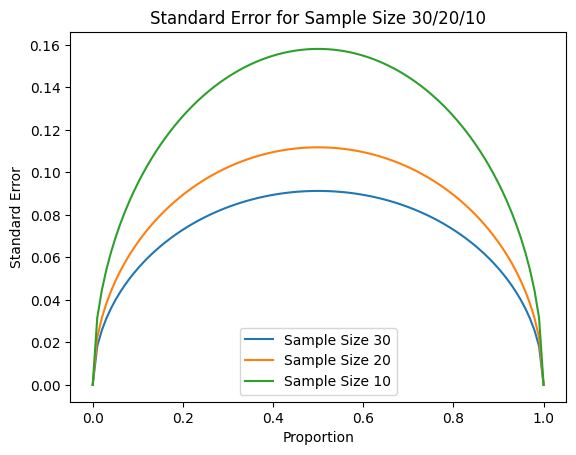

In [2]:
# prompt: Please visualize standard error for sample size of 30 with for proportion from 0..1.

import numpy as np
import matplotlib.pyplot as plt

proportions = np.linspace(0, 1, 100)
standard_errors_30 = np.sqrt((proportions * (1 - proportions)) / 30)
standard_errors_20 = np.sqrt((proportions * (1 - proportions)) / 20)
standard_errors_10 = np.sqrt((proportions * (1 - proportions)) / 10)

plt.plot(proportions, standard_errors_30, label='Sample Size 30')
plt.plot(proportions, standard_errors_20, label='Sample Size 20')
plt.plot(proportions, standard_errors_10, label='Sample Size 10')
plt.legend()
plt.xlabel("Proportion")
plt.ylabel("Standard Error")
plt.title("Standard Error for Sample Size 30/20/10")
plt.show()


Below we show how standard deviation varies as p varies for bernoulli experiments

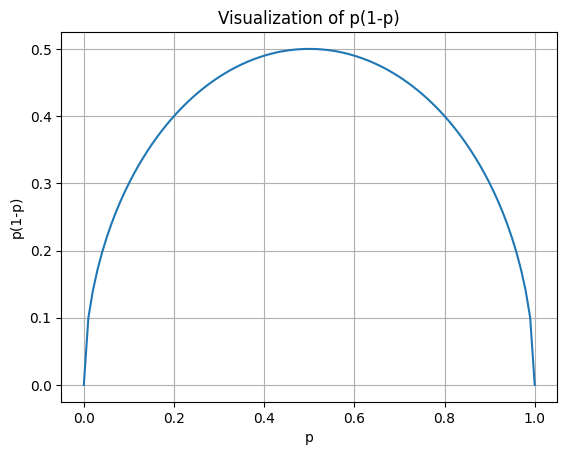

In [9]:
# prompt: visualized p(1-p) from 0..1

import numpy as np
import matplotlib.pyplot as plt
import math

# Create data for x-axis (0 to 1)
p_values = np.linspace(0, 1, 100)

# Calculate p(1-p) for each p
y_values = np.sqrt(p_values * (1 - p_values))

# Plot the function
plt.plot(p_values, y_values)
plt.xlabel("p")
plt.ylabel("p(1-p)")
plt.title("Visualization of p(1-p)")
plt.grid(True)
plt.show()

# Comparing Z, SE, Type I Error cases between Wald and Score test.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from dataclasses import dataclass

@dataclass
class TestResult:
    type_i_error: float
    p_x: np.ndarray
    test_stats: np.ndarray
    reject: np.ndarray
    se: np.ndarray

def calculate_type_i_error_rate(p_true, n, test, alpha=0.05):
    """
    Calculates Type I error rate and returns a TestResult dataclass instance.

    Args:
    p_true (float): True population proportion.
    n (int): Sample size.
    test (function): Function of p_hat, n, and p_0 that computes test stat.
    alpha (float): Significance level.

    Returns:
    TestResult: Contains Type I error rate, probabilities, Z values, rejection decisions, and standard errors.
    """
    x = np.arange(0, n + 1)  # Possible outcomes from 0 to n successes
    p_x = binom.pmf(x, n, p_true)  # Probabilities for each outcome
    p_hat = x / n  # Sample proportions for each outcome
    test_stats = test(p_hat=p_hat, sample_size=n, p0=p_true)  # Z values (test statistics)

    # Standard error for score and Wald tests
    if test == get_score_test_stat:
        # Score test uses standard error based on p0
        se_value = np.sqrt(p_true * (1 - p_true) / n)  # Score test SE (constant)
        se = np.full_like(x, se_value, dtype=float)  # Make se an array of same size as x
    else:
        # Wald test uses standard error based on p_hat
        with np.errstate(divide='ignore', invalid='ignore'):
            se = np.sqrt(p_hat * (1 - p_hat) / n)
            se = np.nan_to_num(se)  # Replace NaN with zero

    # Determine whether to reject H0 for each x based on Z values
    critical_value = norm.ppf(1 - alpha / 2)
    reject = np.abs(test_stats) > critical_value

    # Type I error rate (sum of rejected outcome probabilities)
    type_i_error = np.sum(reject * p_x)

    return TestResult(type_i_error=type_i_error, p_x=p_x, test_stats=test_stats, reject=reject, se=se)

def plot_comparison_test_data(x, test_result_wald: TestResult, test_result_score: TestResult):
    """
    Plots the probability, Z values, rejection decision, and standard error for both Wald and Score tests.

    Args:
    x (array): Success counts.
    test_result_wald (TestResult): Test results from the Wald test.
    test_result_score (TestResult): Test results from the Score test.
    """
    fig, axs = plt.subplots(4, 1, figsize=(12, 18))

    # Plot probability
    axs[0].plot(x, test_result_wald.p_x, 'bo-', label='Probability of Success (p(x))')
    axs[0].set_ylabel('Probability')
    axs[0].set_title('Probability of Success for Each x')
    axs[0].legend()
    axs[0].grid(True)

    # Plot Z values
    axs[1].plot(x, test_result_wald.test_stats, 'go-', label='Z Value (Wald Test)')
    axs[1].plot(x, test_result_score.test_stats, 'mo-', label='Z Value (Score Test)')
    axs[1].set_ylabel('Z Value')
    axs[1].set_title('Z Value for Each x')
    axs[1].axhline(y=norm.ppf(0.975), color='r', linestyle='--', label='Critical Value')
    axs[1].axhline(y=-norm.ppf(0.975), color='r', linestyle='--')
    axs[1].legend()
    axs[1].grid(True)

    # Plot rejection decision
    axs[2].plot(x, test_result_wald.reject, 'go-', label='Reject H0 (Wald Test)')
    axs[2].plot(x, test_result_score.reject, 'mo-', label='Reject H0 (Score Test)')
    axs[2].set_ylabel('Reject H0')
    axs[2].set_title('Rejection of Null Hypothesis for Each x')
    axs[2].legend()
    axs[2].grid(True)

    # Plot standard error
    axs[3].plot(x, test_result_wald.se, 'go-', label='Standard Error (Wald Test)')
    axs[3].plot(x, test_result_score.se, 'mo-', label='Standard Error (Score Test)')
    axs[3].set_ylabel('Standard Error')
    axs[3].set_title('Standard Error for Each x')
    axs[3].legend()
    axs[3].grid(True)

    axs[3].set_xlabel('Number of Successes (x)')
    plt.tight_layout()

    plt.show()

def get_wald_test_stat(p_hat, sample_size, p0):
    # Wald test uses standard error based on p_hat
    with np.errstate(divide='ignore', invalid='ignore'):
        se = np.sqrt(p_hat * (1 - p_hat) / sample_size)
        z = (p_hat - p0) / se
        z = np.nan_to_num(z, nan=0.0, posinf=10.0, neginf=-10.0)  # Replace NaN and inf with zero
    return z

def get_score_test_stat(p_hat, sample_size, p0):
    # Score test uses standard error based on p0
    se = np.sqrt(p0 * (1 - p0) / sample_size)
    with np.errstate(divide='ignore', invalid='ignore'):
        z = (p_hat - p0) / se
        z = np.nan_to_num(z, nan=0.0, posinf=10, neginf=-10.0)  # Replace NaN and inf with zero
    return z


In below analysis you see that with experiment where p_true = 0.01, wald test creates a high Z value for when X = 0 This is because

$\frac{p_{0}-\hat{p}}{\frac{\hat{p}(1-\hat{p})}{\sqrt{n}}}=\text{very high}, \text{when } \hat{p} \text{ is null}$



Score Test Type I Error Rate: 0.036147998312240616
Wald Test Type I Error Rate: 0.7399229712869138


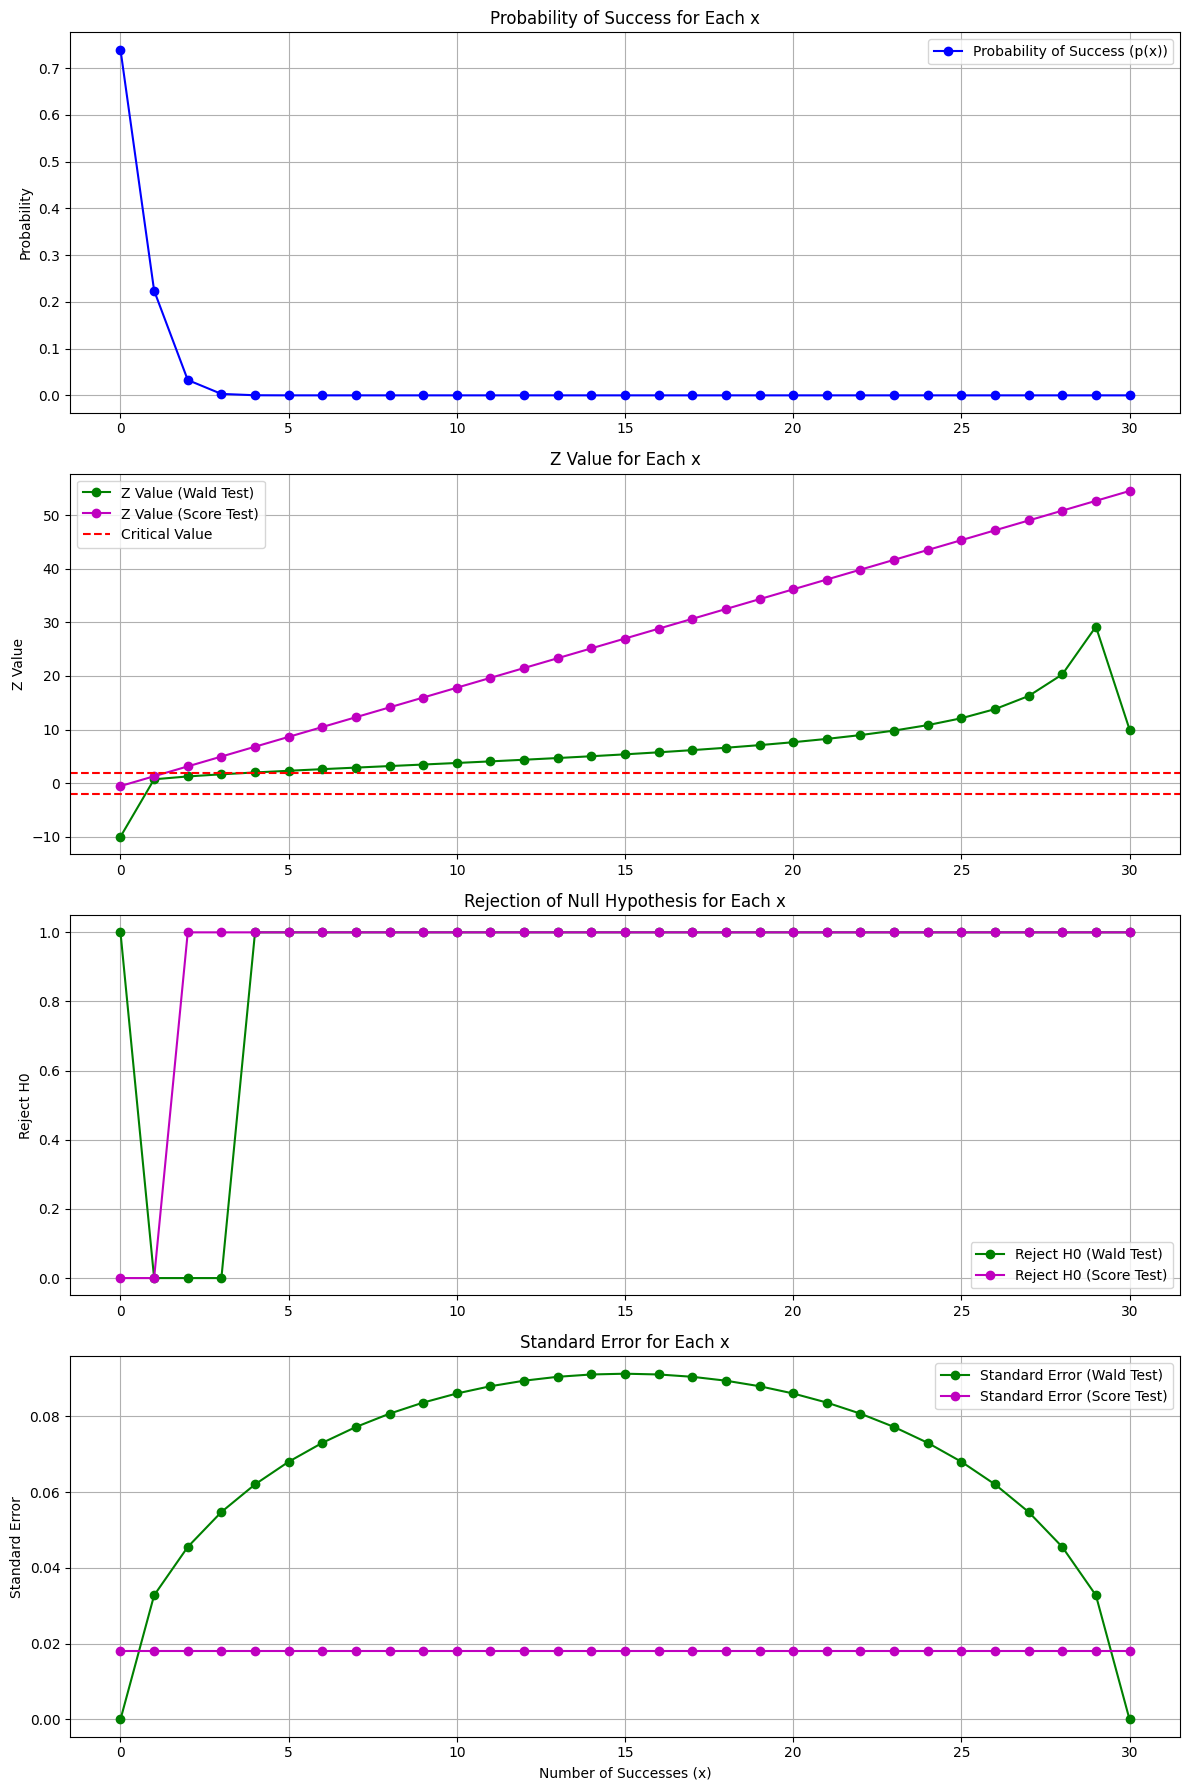

In [5]:

# Example usage
n = 30
p_true = 0.01
alpha = 0.05

# Calculate Type I error and data for score test
score_test_result = calculate_type_i_error_rate(p_true, n, get_score_test_stat, alpha)

# Calculate Type I error and data for wald test
wald_test_result = calculate_type_i_error_rate(p_true, n, get_wald_test_stat, alpha)

print(f"Score Test Type I Error Rate: {score_test_result.type_i_error}")
print(f"Wald Test Type I Error Rate: {wald_test_result.type_i_error}")

# Plot data for comparison of both tests
x = np.arange(0, n + 1)
plot_comparison_test_data(x, wald_test_result, score_test_result)


Score Test Type I Error Rate: 0.025826788661909888
Wald Test Type I Error Rate: 0.19147863843052482


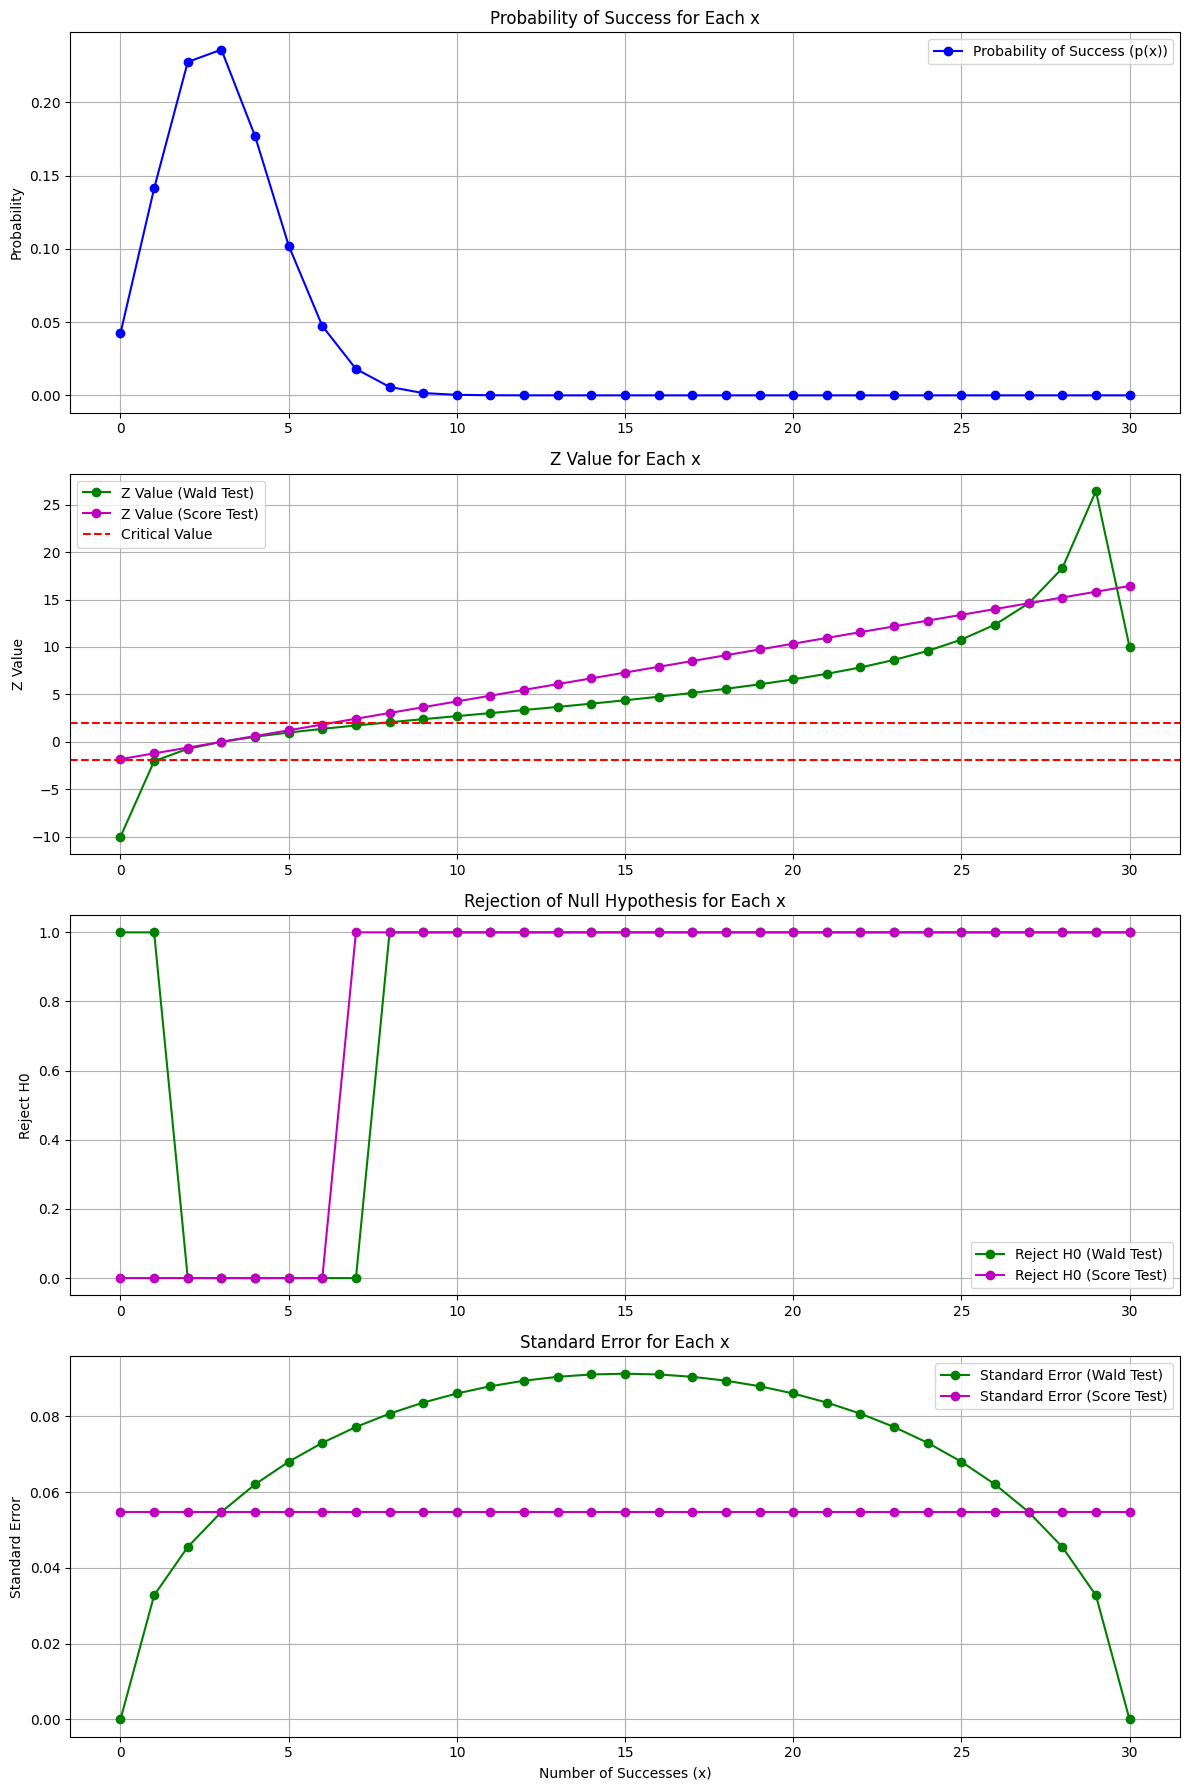

In [11]:

# Example usage
n = 30
p_true = 0.1
alpha = 0.05

# Calculate Type I error and data for score test
score_test_result = calculate_type_i_error_rate(p_true, n, get_score_test_stat, alpha)

# Calculate Type I error and data for wald test
wald_test_result = calculate_type_i_error_rate(p_true, n, get_wald_test_stat, alpha)

print(f"Score Test Type I Error Rate: {score_test_result.type_i_error}")
print(f"Wald Test Type I Error Rate: {wald_test_result.type_i_error}")

# Plot data for comparison of both tests
x = np.arange(0, n + 1)
plot_comparison_test_data(x, wald_test_result, score_test_result)


Score Test Type I Error Rate: 0.07020749078422064
Wald Test Type I Error Rate: 0.04709225459463888


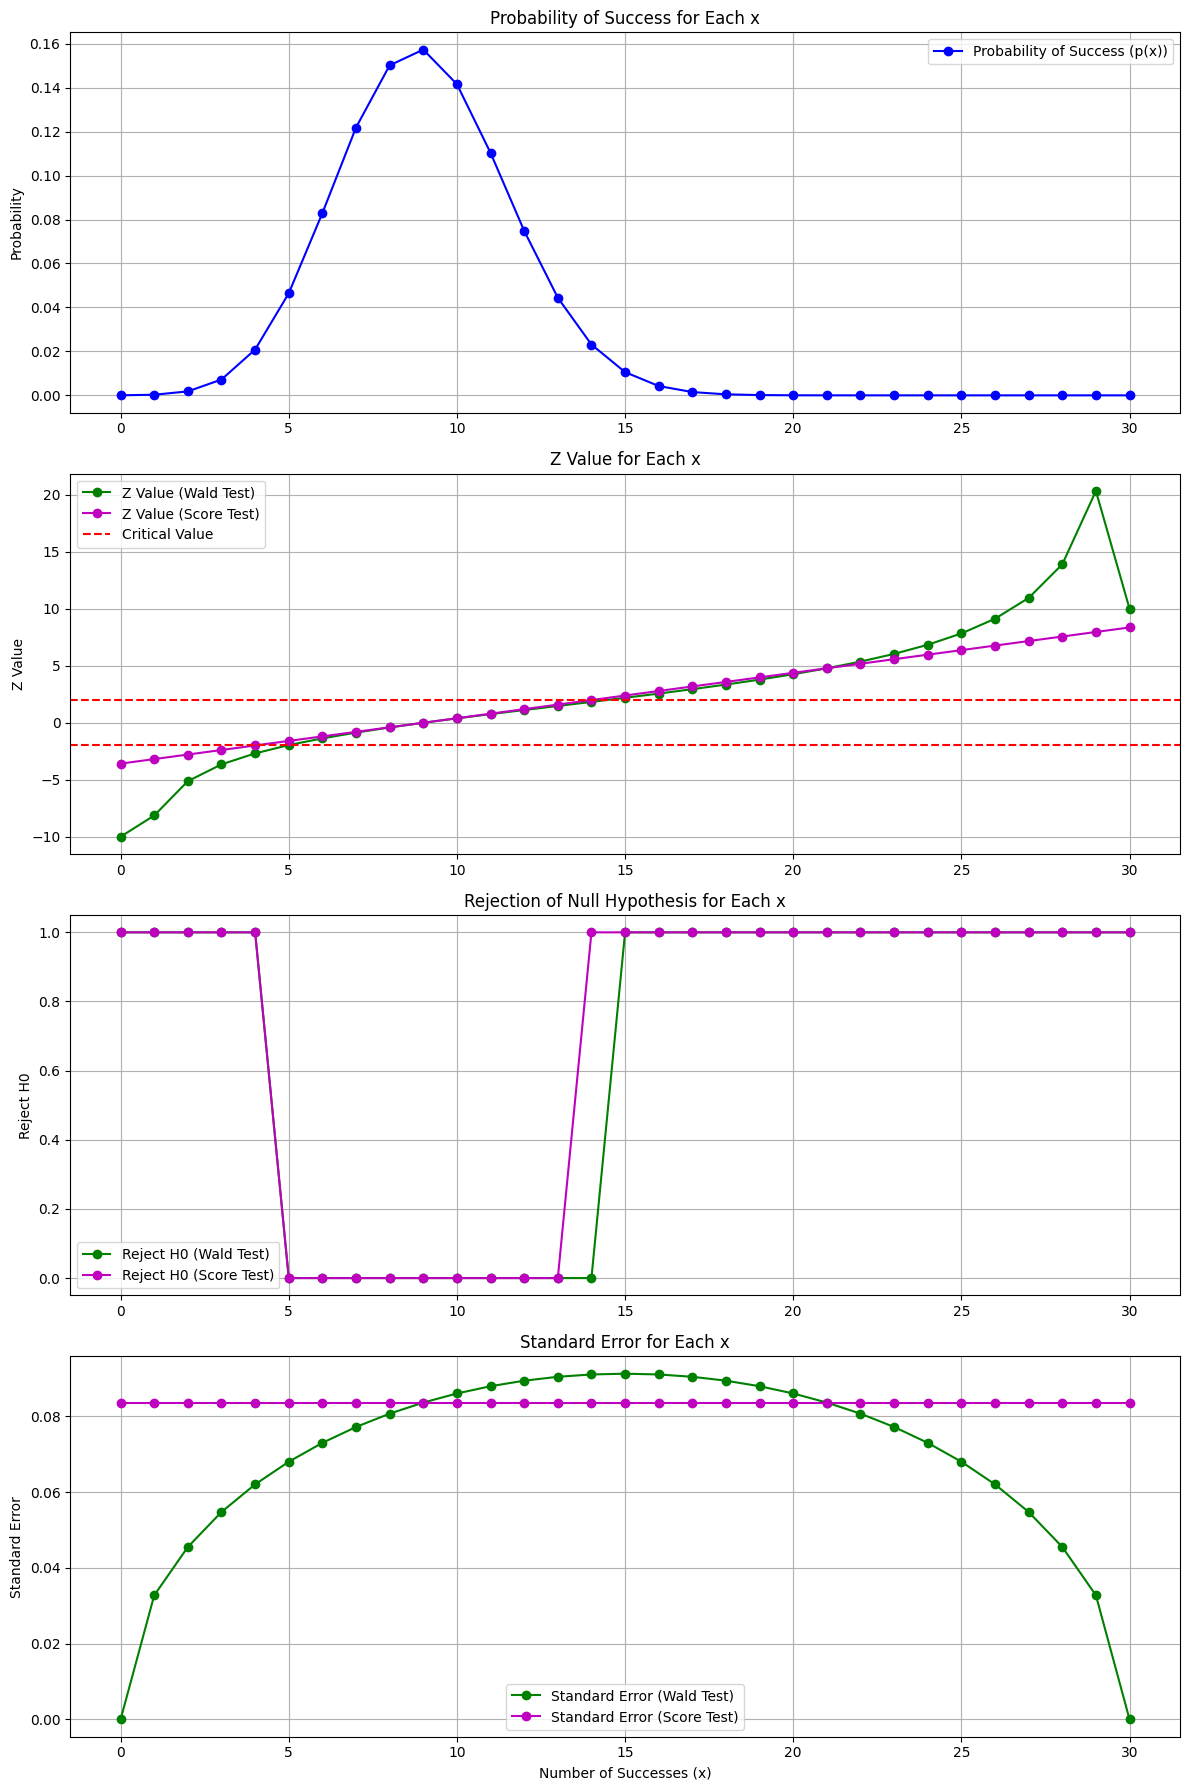

In [7]:

# Example usage
n = 30
p_true = 0.3
alpha = 0.05

# Calculate Type I error and data for score test
score_test_result = calculate_type_i_error_rate(p_true, n, get_score_test_stat, alpha)

# Calculate Type I error and data for wald test
wald_test_result = calculate_type_i_error_rate(p_true, n, get_wald_test_stat, alpha)

print(f"Score Test Type I Error Rate: {score_test_result.type_i_error}")
print(f"Wald Test Type I Error Rate: {wald_test_result.type_i_error}")

# Plot data for comparison of both tests
x = np.arange(0, n + 1)
plot_comparison_test_data(x, wald_test_result, score_test_result)


# Summary

As you can see, Score test does not reject hypothesis where it matters the most. E.g. the cases with highest probability. But in cases like wher p=0.3 Wald test could actually behave better.